In [33]:
#Se importan las bibliotecas.
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import seaborn as sns

In [28]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})

In [18]:
#Se define la ecuación diferencial junto con sus parámetros.
def fun(t, z, m):
    
        # x''(t) + δx'(t) + αx + βx^3 = γCos(ωt)
        # dx/dt = y
        #Reordenando la primera ecuación en base al cambio de variable y despejando dy/dt
        # dy/dt = - δy - αx - βx^3 + γ*Cos(ωt)
        
    """"
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)
    """

    δ, α, β, γ, ω = m                             #Parámetros de la integral
    x, y = z                                      #Parámetros de integración
    fun = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return fun

In [19]:
#Se crea un solucionador de la ecuación diferencial usando el método "runge_kutta_dopri5"
sol = ode(fun)
sol.set_integrator('dopri5')

In [20]:
#Se comienza el proceso para conseguir los puntos para las gráficas.
a = []
b = []

#Se dan los valores de β que pide la actividad.
βj = [-0.003, 0.0000000001, 0.01, 0.04]

#Se hace un for para que saque los puntos de cada curva dada cada valor de 
for j in range (0, len(βj)):

    #Arreglos para cada valor de w y x
    ai = []
    bi =[]

    for i in range(0,251):

        #Se dan valores a los parámetros según la actividad indica.
        γ = 1.0
        α = 1.0        
        δ = 0.1
        ω = i*0.01
        β = βj[j]
        val = δ, α, β, γ, ω
        #Se asignan los parámetros a la solución.
        sol.set_f_params(val)

        #Se fijan los valores iniciales.
        t0 = 0.0
        z0 = [1.0, 0]
        sol.set_initial_value(z0, t0)

        #Se crea un arreglo de tiempos para evaluar la solución.
        #Además, también se hace un arreglo que almacene los valores obtenidos.
        t1 = 40
        n = 400
        t = np.linspace(t0, t1, n)
        solv = np.empty((n, 2))
        solv[0] = z0

        #Se llama al integrador para que solucione usando tiempo "k"
        k = 1

        while sol.successful() and sol.t < t1:
            sol.integrate(t[k])
            solv[k] = sol.y
            k += 1

        x = solv[:,0]

        ai.append(ω)
        bi.append(max(abs(x)))

    #Se guardan todos los arreglos
    a.append(ai)
    b.append(bi)

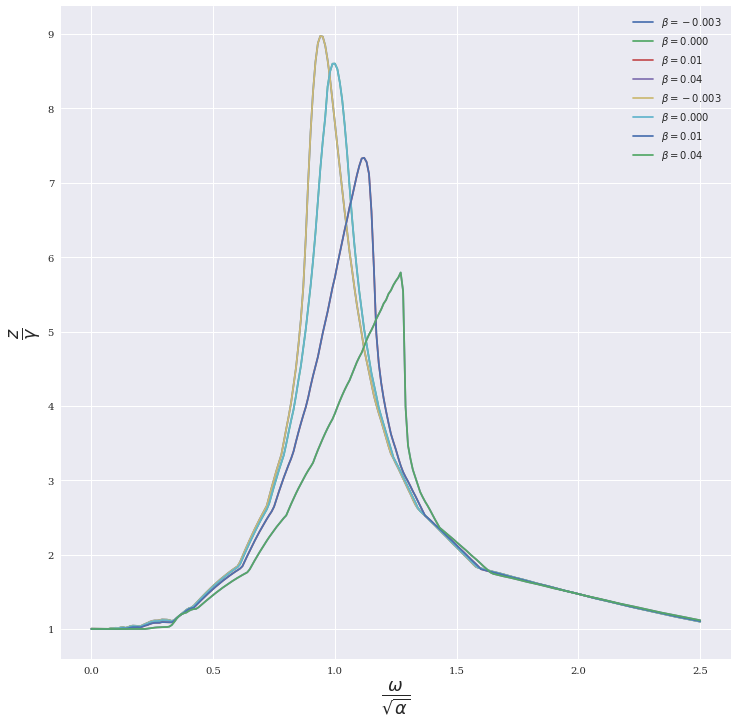

In [39]:
#Se grafican los puntos.
plt.plot(a[0], b[0], label = r'$\beta = -0.003$')
plt.plot(a[1], b[1], label = r'$\beta = 0.000$')
plt.plot(a[2], b[2], label = r'$\beta = 0.01$')
plt.plot(a[3], b[3], label = r'$\beta = 0.04$')

plt.legend()
plt.grid()
plt.xlabel(r'$\frac{\omega}{\sqrt{\alpha}}$', fontsize = 25)
plt.ylabel(r'$\frac{z}{\gamma}$', fontsize = 25)
plt.grid(True)
plt.show()